In [1]:
import pandas as pd
df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
cols=['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth']
X = df[cols]
y = df['Species']

In [4]:
# SVM방식

#같은 비율로 샘플링하는 KFold 모형
#회귀분석 : KFold, 분류: StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
#                   0/1/2 클래스별로 같은 수로 샘플링, 5세트
i=1
train_scores=[]
test_scores=[]

for train_index, test_index in skf.split(X,y):
    print(i,'fold')
    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,]
    y_train, y_test = y[train_index], y[test_index]
    model = SVC(random_state=10)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(score)
    train_scores.append(score)
    score = model.score(X_test, y_test)
    print(score)
    test_scores.append(score)
    i+=1
    
print('\naverage')
print(np.mean(train_scores))
print(np.mean(test_scores))

1 fold
0.9666666666666667
1.0
2 fold
0.9583333333333334
1.0
3 fold
0.975
0.9333333333333333
4 fold
0.9833333333333333
0.9333333333333333
5 fold
0.9666666666666667
1.0

average
0.97
0.9733333333333334


In [6]:
# KNN 방식

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
kf = StratifiedKFold(5, shuffle=True, random_state=0)
k_range = list(range(1, 11))
means_tr = []
means_te = []

for k in k_range:
    train_scores = []
    test_scores = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for train, test in kf.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[train,], X.iloc[test,], y[train], y[test]
        knn.fit(X_train, y_train)
        score = knn.score(X_train, y_train)
        train_scores.append(score)
        score = knn.score(X_test, y_test)
        test_scores.append(score)
        #print('k: %d, test score : %f' % (k, score))
    mean_tr=np.mean(train_scores)
    mean_te=np.mean(test_scores)
    print("K : %d, train score's mean %f" % (k, mean_tr))
    print("K : %d, test score's mean %f" % (k, mean_te))
    means_tr.append(mean_tr)
    means_te.append(mean_te)

max_score=max(means_te)
print('최고 정확도:',max_score)
idx=np.where(means_te==max_score)[0][0]
print('최적의 k:',k_range[idx])

c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

K : 1, train score's mean 1.000000
K : 1, test score's mean 0.960000
K : 2, train score's mean 0.976667
K : 2, test score's mean 0.953333
K : 3, train score's mean 0.965000
K : 3, test score's mean 0.960000
K : 4, train score's mean 0.973333
K : 4, test score's mean 0.960000
K : 5, train score's mean 0.970000
K : 5, test score's mean 0.953333


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

K : 6, train score's mean 0.975000
K : 6, test score's mean 0.953333
K : 7, train score's mean 0.980000
K : 7, test score's mean 0.960000
K : 8, train score's mean 0.973333
K : 8, test score's mean 0.966667
K : 9, train score's mean 0.976667
K : 9, test score's mean 0.960000
K : 10, train score's mean 0.975000
K : 10, test score's mean 0.960000
최고 정확도: 0.9666666666666668
최적의 k: 8


c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

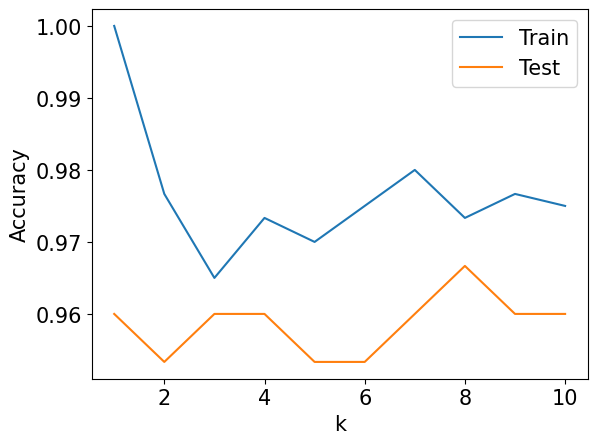

In [7]:
plt.rcParams["font.size"]=15
plt.plot(k_range, means_tr, label="Train")
plt.plot(k_range, means_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
# k=8일때 가장 좋음

In [8]:
from sklearn.model_selection import cross_val_score
svm = SVC(random_state=0)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
#교차검증을 자동으로 수행하는 함수
result=cross_val_score(svm, X, y, cv=skf)
print(result)
print(np.mean(result)*100)

[1.         1.         0.93333333 0.93333333 1.        ]
97.33333333333334
